# 6.1 Sourcing Open Data

### This script contains the following points:
- **01. Importing Libraries & Data**
- **02. Initial Data Exploration & Data Cleaning**
- **03. Assigning Regions to Each Country**
- **04. Checking for Outliers**
- **05. Cleaned Data Profile**
- **06. Cleaned Data Export**

## 01. Importing Libraries & Data

In [4]:
# Import all necessary libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [5]:
# Turn Path into a String & Assign Python Shortcut
path = '/Users/mgottlieb/Documents/World Happiness Analysis'

In [6]:
# Import the dataset for this task
df_happiness = pd.read_excel(os.path.join(path, '02 Data', 'Original Data', 'World-Happiness-Dataset.xls'))

In [7]:
# Check the import
df_happiness.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919


In [8]:
# Check the import
df_happiness.shape

(2363, 11)

## 02. Initial Data Exploration & Data Cleaning

In [10]:
# Display datframe info
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+ KB


**object:** Represents textual data or mixed types, which makes sense for the name of a country. This allows for storing names and categorical text information.\
**int64:** Represents integer numerical data without decimal points, which also makes sense for the year. This allows for efficient storage and operations on yearly data.\
**float64:** Represents continuous numerical data with decimal points, this makes sense for all the other columns as they are either numerical data, like "GDP" and "Healthy life expectancy at birth" or they are from the survey which measured on a numerical scale.\
\
***I can conclude the there are no mixed data types within individual columns. The object data type for Country name is expected because it contains text data.***

### Handling Missing Values
Use fillna to fill missing values with the mean for numerical columns.

In [9]:
# Check for missing values
missing_values = df_happiness.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   28
Social support                       13
Healthy life expectancy at birth     63
Freedom to make life choices         36
Generosity                           81
Perceptions of corruption           125
Positive affect                      24
Negative affect                      16
dtype: int64


In looking at the original dataset, removing rows would significantly impact the overall dataset by reducing its size and potentially introducing bias, especially if the missing values are not randomly distributed. This could lead to a loss of valuable information and decrease the statistical power of the analysis. For example, if specific years or countries have more missing data, dropping these rows could skew the results and misrepresent trends and correlations in the data.\
\
Instead, I decided to impute the missing values using appropriate methods based on the characteristics of the data.

In [11]:
# Impute missing values based on the analysis

# Log GDP per capita: Mean imputation
df_happiness['Log GDP per capita'].fillna(df_happiness['Log GDP per capita'].mean(), inplace=True)

# Social support: Mean imputation
df_happiness['Social support'].fillna(df_happiness['Social support'].mean(), inplace=True)

# Healthy life expectancy at birth: Median imputation, potentally skewed so median is less affected by outliers
df_happiness['Healthy life expectancy at birth'].fillna(df_happiness['Healthy life expectancy at birth'].median(), inplace=True)

# Freedom to make life choices: Median imputation, could be skewed, median is less affected by outliers
df_happiness['Freedom to make life choices'].fillna(df_happiness['Freedom to make life choices'].median(), inplace=True)

# Generosity: Mode imputation, for categorical-like data this ensure the most common value is used for imputation
df_happiness['Generosity'].fillna(df_happiness['Generosity'].mode()[0], inplace=True)

# Perceptions of corruption: Mode imputation, for categorical-like data this ensure the most common value is used for imputation
# Reason: Similar to generosity, often represents categorical-like data; mode maintains the most common perception.
df_happiness['Perceptions of corruption'].fillna(df_happiness['Perceptions of corruption'].mode()[0], inplace=True)

# Positive affect: Mean imputation
df_happiness['Positive affect'].fillna(df_happiness['Positive affect'].mean(), inplace=True)

# Negative affect: Mean imputation
df_happiness['Negative affect'].fillna(df_happiness['Negative affect'].mean(), inplace=True)

In [14]:
# Check for missing values to verify
missing_values_fixed = df_happiness.isnull().sum()

print("Missing values in each column:")
print(missing_values_fixed)

Missing values in each column:
Country name                        0
year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64


### Checking for Duplicates

In [15]:
duplicates = df_happiness.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


### Checking for Mixed-type Columns

In [16]:
# Identify mixed-type columns
mixed_type_columns = df_happiness.columns[df_happiness.apply(lambda col: col.apply(type).nunique() > 1)]

# Print columns with mixed data types
print("Columns with mixed data types:")
for col in mixed_type_columns:
    print(f"{col}: {df_happiness[col].apply(type).unique()}")

# Display the unique types in each mixed-type column
for col in mixed_type_columns:
    print(f"\nColumn '{col}' has the following unique data types:")
    print(df_happiness[col].apply(type).unique())

Columns with mixed data types:


### Checking for Data Inconsistencies 

In [17]:
df_happiness.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,2014.763860,5.483562,9.399673,0.809369,63.447103,0.750608,-0.011547,0.706467,0.651878,0.273160
std,5.059436,1.125523,1.145213,0.120877,6.756316,0.138323,0.170214,0.239889,0.105708,0.086838
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.520145,0.744106,59.545000,0.662055,-0.127570,0.655807,0.572984,0.208656
50%,2015.000000,5.448725,9.491772,0.833621,65.099998,0.771122,-0.028736,0.789678,0.662318,0.263090
75%,2019.000000,6.323592,10.381806,0.903636,68.400002,0.860766,0.088079,0.863694,0.736519,0.325661
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


The range for most numerical columns, such as year, Life Ladder, Log GDP per capita, Social support, Freedom to make life choices, Positive affect, and Negative affect, appear consistent with expected values and scales.There are negative values in the Generosity column, after checking with the World Happiness website, the negative values in the Generosity column have been verified.\
\
The minimum value for **Healthy life expectancy at birth** at 6.72 years seems potentially inaccurate, suggesting a possible data entry error or anomaly that needs verification and correction.

In [18]:
# Check for outliers or incorrect values in 'Healthy life expectancy at birth'
print(df_happiness[df_happiness['Healthy life expectancy at birth'] < 20])

    Country name  year  Life Ladder  Log GDP per capita  Social support  \
818        Haiti  2006     3.754156            7.976453        0.693801   
819        Haiti  2008     3.846329            8.015880        0.679098   

     Healthy life expectancy at birth  Freedom to make life choices  \
818                          6.720000                      0.449475   
819                         17.360001                      0.464971   

     Generosity  Perceptions of corruption  Positive affect  Negative affect  
818    0.354996                   0.853506         0.583196         0.332141  
819    0.213010                   0.811659         0.572523         0.255774  


Based on the output, it seems that the low values for Healthy life expectancy at birth are associated with Haiti in the years 2006 and 2008. Checked on the World Health Organization (https://apps.who.int/gho/data/view.main.SDG2016LEXv?lang=en) and looking at the Life expectancy data, WHO doesn't have 2006 and 2008 however they do have Haiti's healthy life expectancy at birth for the years 2000 (50), 2010 (28), 2015 (54.6), and 2019 (55.8). 

Given the original data and the need to correct the inconsistent values for 2006 and 2008 based on the reliable WHO, I am going to:

1. Create a DataFrame with the reliable data and the years needing interpolation.
2. Perform interpolation on the selected years.
3. Replace the values in the original DataFrame.

In [38]:
# Provided reliable data for Haiti from WHO
who_data = {
    'year': [2000, 2010, 2015, 2019],
    'Healthy life expectancy at birth': [50, 28, 54.6, 55.8]
}

In [39]:
# Create a DataFrame for WHO data
df_who = pd.DataFrame(who_data)
df_who['Country name'] = 'Haiti'

In [40]:
# Additional data with years needing interpolation
additional_data = {
    'year': [2006, 2008],
    'Healthy life expectancy at birth': [np.nan, np.nan]
}

In [41]:
# Create a DataFrame for additional data
df_additional = pd.DataFrame(additional_data)
df_additional['Country name'] = 'Haiti'

In [42]:
# Combine the reliable data with the additional data
df_combined = pd.concat([df_who, df_additional]).sort_values(by='year').reset_index(drop=True)

In [43]:
# Interpolate missing values
df_combined['Healthy life expectancy at birth'] = df_combined['Healthy life expectancy at birth'].interpolate()

In [44]:
# Extract the interpolated values for 2006 and 2008
interpolated_values = df_combined[df_combined['year'].isin([2006, 2008])]

In [45]:
# Display the interpolated values
print("Interpolated values for 2006 and 2008:")
print(interpolated_values)

Interpolated values for 2006 and 2008:
   year  Healthy life expectancy at birth Country name
1  2006                         42.666667        Haiti
2  2008                         35.333333        Haiti


In [46]:
# Replace outlier values with interpolated data
for index, row in interpolated_values.iterrows():
    df_happiness.loc[(df_happiness['Country name'] == row['Country name']) & 
                     (df_happiness['year'] == row['year']), 
                     'Healthy life expectancy at birth'] = row['Healthy life expectancy at birth']

In [47]:
# Verify the changes made
print("Updated values for Haiti in the original dataset:")
print(df_happiness[df_happiness['Country name'] == 'Haiti'][['Country name', 'year', 'Healthy life expectancy at birth']])

Updated values for Haiti in the original dataset:
    Country name  year  Healthy life expectancy at birth
818        Haiti  2006                         42.666667
819        Haiti  2008                         35.333333
820        Haiti  2010                         28.000000
821        Haiti  2011                         33.320000
822        Haiti  2012                         38.639999
823        Haiti  2013                         43.959999
824        Haiti  2014                         49.279999
825        Haiti  2015                         54.599998
826        Haiti  2016                         54.900002
827        Haiti  2017                         55.200001
828        Haiti  2018                         55.500000


### Renaming Columns to Snake Case For Consistency

In [49]:
# Print the column names
list(df_happiness.columns)

['Country name',
 'year',
 'Life Ladder',
 'Log GDP per capita',
 'Social support',
 'Healthy life expectancy at birth',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption',
 'Positive affect',
 'Negative affect']

In [51]:
# Define the new column names in snake_case
new_column_names = {
    'Country name': 'country_name',
    'year': 'year',
    'Life Ladder': 'life_ladder',
    'Log GDP per capita': 'log_gdp_per_capita',
    'Social support': 'social_support',
    'Healthy life expectancy at birth': 'healthy_life_expectancy_at_birth',
    'Freedom to make life choices': 'freedom_to_make_life_choices',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'perceptions_of_corruption',
    'Positive affect': 'positive_affect',
    'Negative affect': 'negative_affect'
}

In [52]:
# Rename the columns in the DataFrame
df_happiness.rename(columns=new_column_names, inplace=True)

In [53]:
# Print the updated column names to verify changes
print(df_happiness.columns)

Index(['country_name', 'year', 'life_ladder', 'log_gdp_per_capita',
       'social_support', 'healthy_life_expectancy_at_birth',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'positive_affect', 'negative_affect'],
      dtype='object')


## 03. Assigning Regions to Each Country

Assigning regions to each country allows for more granular and region-specific analysis, enabling the identification of regional trends and comparisons in the dataset.\
\
This would also fufill the requirement *"Include a geographical component with at least 2 different values (e.g., countries, continents,
U.S. states, cities, latitude and longitude values—anything you can visualize on a map!)."*

In [54]:
# Get all unique values in the country_name column
unique_countries = df_happiness['country_name'].unique()

In [55]:
unique_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)',
       'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Estonia', 'Eswatini', 'Ethiopia', 'Finland',
       'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hong Kong S.A.R. of China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Ivory Coast', 'Jamaica', 'Japan', 

### List of Proposed Regional Separation
1. **Western Europe:** This region is characterized by advanced economies, high standards of living, and includes countries with similar cultural and historical backgrounds.
2. **Australia and New Zealand:** These countries are geographically isolated from other continents but share cultural and historical ties with Western countries.
3. **Middle East and Northern Africa:** This region includes countries with shared historical, cultural, and religious ties, and often similar economic and political contexts.
4. **Latin America and Caribbean:** This region includes Spanish and Portuguese-speaking countries in the Americas with shared historical backgrounds and socio-economic characteristics.
5. **North America:** This region includes the highly developed countries of the United States and Canada, which share economic and cultural ties.
6. **Southeastern Asia:** This region includes countries located in the Southeast Asian subregion, sharing tropical climates and similar economic activities.
7. **Eastern Asia:** This region includes economically significant and populous countries in East Asia.
8. **Central and Eastern Europe:** This region includes countries that share historical ties with the Eastern Bloc and have transitioned from communist regimes.
9. **Sub-Saharan Africa:** This region includes countries located south of the Sahara Desert, sharing similar developmental challenges and cultural traits.
10. **Southern Asia:** This region includes countries on the Indian subcontinent, characterized by diverse cultures and significant populations.

In [56]:
# Define a dictionary to map countries to regions
country_to_region = {
    'Afghanistan': 'Southern Asia',
    'Albania': 'Central and Eastern Europe',
    'Algeria': 'Middle East and Northern Africa',
    'Angola': 'Sub-Saharan Africa',
    'Argentina': 'Latin America and Caribbean',
    'Armenia': 'Central and Eastern Europe',
    'Australia': 'Australia and New Zealand',
    'Austria': 'Western Europe',
    'Azerbaijan': 'Central and Eastern Europe',
    'Bahrain': 'Middle East and Northern Africa',
    'Bangladesh': 'Southern Asia',
    'Belarus': 'Central and Eastern Europe',
    'Belgium': 'Western Europe',
    'Belize': 'Latin America and Caribbean',
    'Benin': 'Sub-Saharan Africa',
    'Bhutan': 'Southern Asia',
    'Bolivia': 'Latin America and Caribbean',
    'Bosnia and Herzegovina': 'Central and Eastern Europe',
    'Botswana': 'Sub-Saharan Africa',
    'Brazil': 'Latin America and Caribbean',
    'Bulgaria': 'Central and Eastern Europe',
    'Burkina Faso': 'Sub-Saharan Africa',
    'Burundi': 'Sub-Saharan Africa',
    'Cambodia': 'Southeastern Asia',
    'Cameroon': 'Sub-Saharan Africa',
    'Canada': 'North America',
    'Central African Republic': 'Sub-Saharan Africa',
    'Chad': 'Sub-Saharan Africa',
    'Chile': 'Latin America and Caribbean',
    'China': 'Eastern Asia',
    'Colombia': 'Latin America and Caribbean',
    'Comoros': 'Sub-Saharan Africa',
    'Congo (Brazzaville)': 'Sub-Saharan Africa',
    'Congo (Kinshasa)': 'Sub-Saharan Africa',
    'Costa Rica': 'Latin America and Caribbean',
    'Croatia': 'Central and Eastern Europe',
    'Cuba': 'Latin America and Caribbean',
    'Cyprus': 'Middle East and Northern Africa',
    'Czechia': 'Central and Eastern Europe',
    'Denmark': 'Western Europe',
    'Djibouti': 'Sub-Saharan Africa',
    'Dominican Republic': 'Latin America and Caribbean',
    'Ecuador': 'Latin America and Caribbean',
    'Egypt': 'Middle East and Northern Africa',
    'El Salvador': 'Latin America and Caribbean',
    'Estonia': 'Central and Eastern Europe',
    'Eswatini': 'Sub-Saharan Africa',
    'Ethiopia': 'Sub-Saharan Africa',
    'Finland': 'Western Europe',
    'France': 'Western Europe',
    'Gabon': 'Sub-Saharan Africa',
    'Gambia': 'Sub-Saharan Africa',
    'Georgia': 'Central and Eastern Europe',
    'Germany': 'Western Europe',
    'Ghana': 'Sub-Saharan Africa',
    'Greece': 'Western Europe',
    'Guatemala': 'Latin America and Caribbean',
    'Guinea': 'Sub-Saharan Africa',
    'Guyana': 'Latin America and Caribbean',
    'Haiti': 'Latin America and Caribbean',
    'Honduras': 'Latin America and Caribbean',
    'Hong Kong S.A.R. of China': 'Eastern Asia',
    'Hungary': 'Central and Eastern Europe',
    'Iceland': 'Western Europe',
    'India': 'Southern Asia',
    'Indonesia': 'Southeastern Asia',
    'Iran': 'Southern Asia',
    'Iraq': 'Middle East and Northern Africa',
    'Ireland': 'Western Europe',
    'Israel': 'Middle East and Northern Africa',
    'Italy': 'Western Europe',
    'Ivory Coast': 'Sub-Saharan Africa',
    'Jamaica': 'Latin America and Caribbean',
    'Japan': 'Eastern Asia',
    'Jordan': 'Middle East and Northern Africa',
    'Kazakhstan': 'Central and Eastern Europe',
    'Kenya': 'Sub-Saharan Africa',
    'Kosovo': 'Central and Eastern Europe',
    'Kuwait': 'Middle East and Northern Africa',
    'Kyrgyzstan': 'Central and Eastern Europe',
    'Laos': 'Southeastern Asia',
    'Latvia': 'Central and Eastern Europe',
    'Lebanon': 'Middle East and Northern Africa',
    'Lesotho': 'Sub-Saharan Africa',
    'Liberia': 'Sub-Saharan Africa',
    'Libya': 'Middle East and Northern Africa',
    'Lithuania': 'Central and Eastern Europe',
    'Luxembourg': 'Western Europe',
    'Madagascar': 'Sub-Saharan Africa',
    'Malawi': 'Sub-Saharan Africa',
    'Malaysia': 'Southeastern Asia',
    'Maldives': 'Southern Asia',
    'Mali': 'Sub-Saharan Africa',
    'Malta': 'Western Europe',
    'Mauritania': 'Sub-Saharan Africa',
    'Mauritius': 'Sub-Saharan Africa',
    'Mexico': 'Latin America and Caribbean',
    'Moldova': 'Central and Eastern Europe',
    'Mongolia': 'Eastern Asia',
    'Montenegro': 'Central and Eastern Europe',
    'Morocco': 'Middle East and Northern Africa',
    'Mozambique': 'Sub-Saharan Africa',
    'Myanmar': 'Southeastern Asia',
    'Namibia': 'Sub-Saharan Africa',
    'Nepal': 'Southern Asia',
    'Netherlands': 'Western Europe',
    'New Zealand': 'Australia and New Zealand',
    'Nicaragua': 'Latin America and Caribbean',
    'Niger': 'Sub-Saharan Africa',
    'Nigeria': 'Sub-Saharan Africa',
    'North Macedonia': 'Central and Eastern Europe',
    'Norway': 'Western Europe',
    'Oman': 'Middle East and Northern Africa',
    'Pakistan': 'Southern Asia',
    'Panama': 'Latin America and Caribbean',
    'Paraguay': 'Latin America and Caribbean',
    'Peru': 'Latin America and Caribbean',
    'Philippines': 'Southeastern Asia',
    'Poland': 'Central and Eastern Europe',
    'Portugal': 'Western Europe',
    'Qatar': 'Middle East and Northern Africa',
    'Romania': 'Central and Eastern Europe',
    'Russia': 'Central and Eastern Europe',
    'Rwanda': 'Sub-Saharan Africa',
    'Saudi Arabia': 'Middle East and Northern Africa',
    'Senegal': 'Sub-Saharan Africa',
    'Serbia': 'Central and Eastern Europe',
    'Sierra Leone': 'Sub-Saharan Africa',
    'Singapore': 'Southeastern Asia',
    'Slovakia': 'Central and Eastern Europe',
    'Slovenia': 'Central and Eastern Europe',
    'Somalia': 'Sub-Saharan Africa',
    'Somaliland region': 'Sub-Saharan Africa',
    'South Africa': 'Sub-Saharan Africa',
    'South Korea': 'Eastern Asia',
    'South Sudan': 'Sub-Saharan Africa',
    'Spain': 'Western Europe',
    'Sri Lanka': 'Southern Asia',
    'State of Palestine': 'Middle East and Northern Africa',
    'Sudan': 'Sub-Saharan Africa',
    'Suriname': 'Latin America and Caribbean',
    'Sweden': 'Western Europe',
    'Switzerland': 'Western Europe',
    'Syria': 'Middle East and Northern Africa',
    'Taiwan Province of China': 'Eastern Asia',
    'Tajikistan': 'Central and Eastern Europe',
    'Tanzania': 'Sub-Saharan Africa',
    'Thailand': 'Southeastern Asia',
    'Togo': 'Sub-Saharan Africa',
    'Trinidad and Tobago': 'Latin America and Caribbean',
    'Tunisia': 'Middle East and Northern Africa',
    'Turkmenistan': 'Central and Eastern Europe',
    'Türkiye': 'Central and Eastern Europe',
    'Uganda': 'Sub-Saharan Africa',
    'Ukraine': 'Central and Eastern Europe',
    'United Arab Emirates': 'Middle East and Northern Africa',
    'United Kingdom': 'Western Europe',
    'United States': 'North America',
    'Uruguay': 'Latin America and Caribbean',
    'Uzbekistan': 'Central and Eastern Europe',
    'Venezuela': 'Latin America and Caribbean',
    'Vietnam': 'Southeastern Asia',
    'Yemen': 'Middle East and Northern Africa',
    'Zambia': 'Sub-Saharan Africa',
    'Zimbabwe': 'Sub-Saharan Africa'
}

In [57]:
# Map the country_name column to regions and create a new region column
df_happiness['region'] = df_happiness['country_name'].map(country_to_region)

In [58]:
# Verify the mapping by printing unique combinations of country_name and region
print(df_happiness[['country_name', 'region']].drop_duplicates())

     country_name                           region
0     Afghanistan                    Southern Asia
15        Albania       Central and Eastern Europe
31        Algeria  Middle East and Northern Africa
42         Angola               Sub-Saharan Africa
46      Argentina      Latin America and Caribbean
...           ...                              ...
2278    Venezuela      Latin America and Caribbean
2296      Vietnam                Southeastern Asia
2314        Yemen  Middle East and Northern Africa
2328       Zambia               Sub-Saharan Africa
2345     Zimbabwe               Sub-Saharan Africa

[165 rows x 2 columns]


## 04. Checking for Outliers

In [59]:
# Define numerical columns to check for outliers
numerical_columns = ['life_ladder', 'log_gdp_per_capita', 'social_support', 
                     'healthy_life_expectancy_at_birth', 'freedom_to_make_life_choices', 
                     'generosity', 'perceptions_of_corruption', 'positive_affect', 'negative_affect']

In [62]:
# Using IQR (Interquartile Range)
Q1 = df_happiness[numerical_columns].quantile(0.25)
Q3 = df_happiness[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

In [63]:
outliers_iqr = df_happiness[((df_happiness[numerical_columns] < (Q1 - 1.5 * IQR)) | (df_happiness[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers identified using IQR method:")
print(outliers_iqr)

Outliers identified using IQR method:
     country_name  year  life_ladder  log_gdp_per_capita  social_support  \
0     Afghanistan  2008     3.723590            7.350416        0.450662   
5     Afghanistan  2013     3.572100            7.680333        0.483552   
9     Afghanistan  2017     2.661718            7.647830        0.490880   
11    Afghanistan  2019     2.375092            7.640086        0.419973   
12    Afghanistan  2021     2.436034            7.324501        0.454175   
...           ...   ...          ...                 ...             ...   
2345     Zimbabwe  2006     3.826268            7.459545        0.821656   
2346     Zimbabwe  2007     3.280247            7.412637        0.828113   
2347     Zimbabwe  2008     3.174264            7.210233        0.843475   
2348     Zimbabwe  2009     4.055914            7.313474        0.805781   
2349     Zimbabwe  2010     4.681570            7.495286        0.856638   

      healthy_life_expectancy_at_birth  freedom_t

/var/folders/79/dbxtn02s0kzdngngl4z03wch0000gp/T/ipykernel_4206/2404094726.py:3: UserWarning: When passing multiple axes, layout keyword is ignored.
  df_happiness[numerical_columns].plot(kind='box', subplots=True, layout=(3, 3), ax=axes)


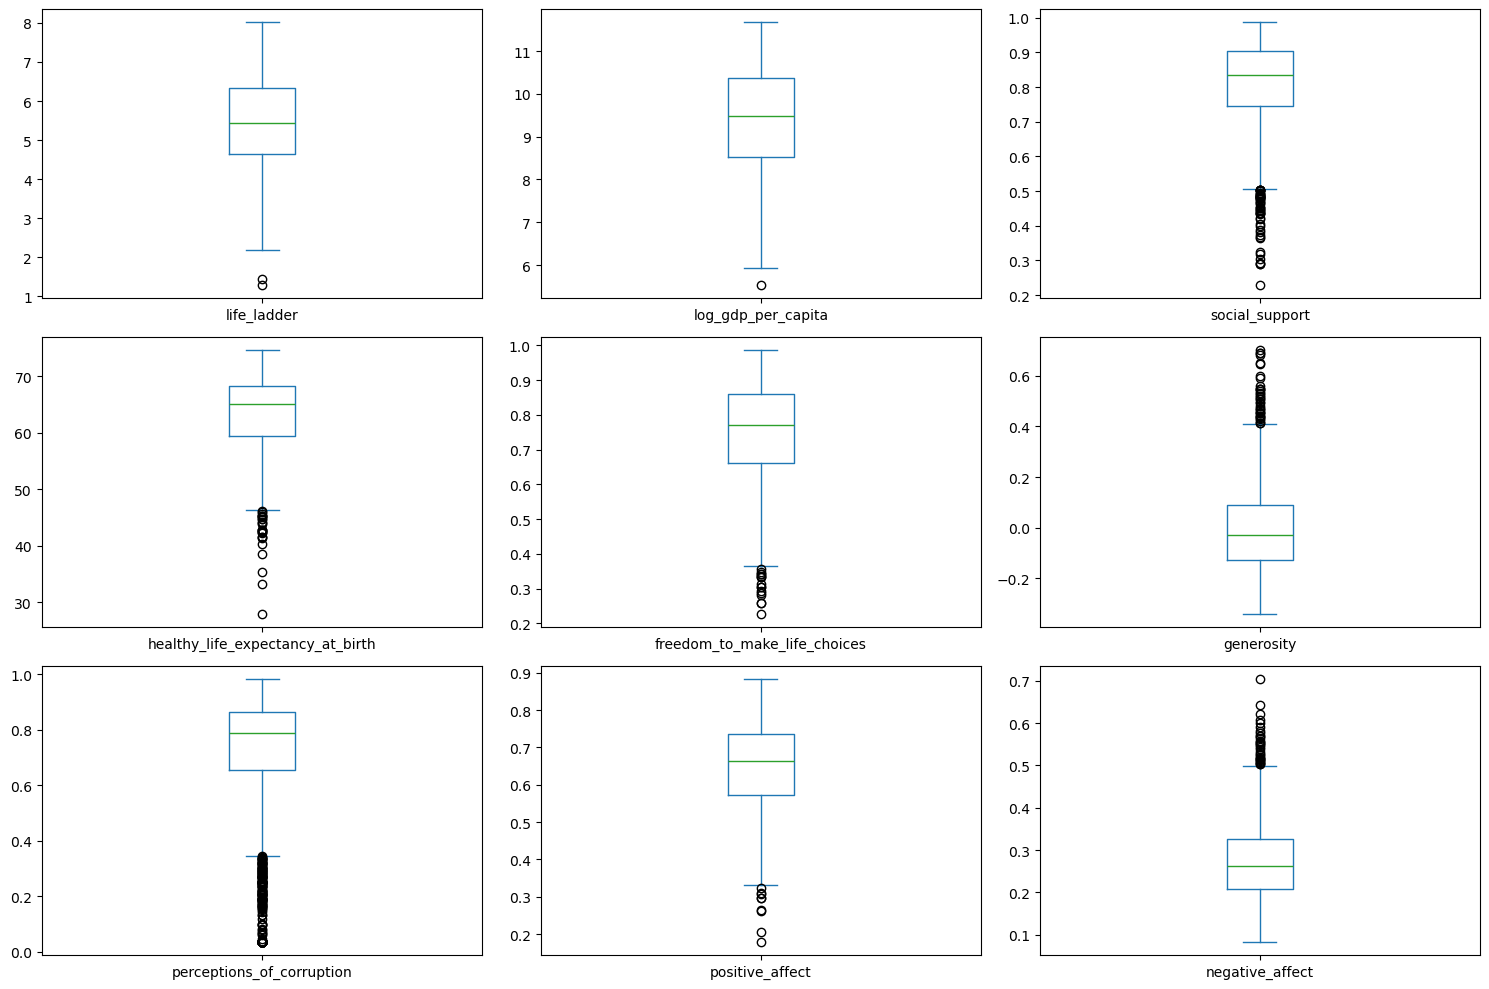

In [67]:
# Plot box plots for each numerical column and save the figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
df_happiness[numerical_columns].plot(kind='box', subplots=True, layout=(3, 3), ax=axes)
plt.tight_layout()

# Save the figure to a file
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'box_plots_original_data.png'))

# Show the plot
plt.show()

- **Life Ladder:** The distribution appears slightly skewed to the lower side due to the presence of outliers.
- **Log GDP per capita:** Distribution is approximately symmetric, but there is a minor left skew due to a lower outlier.
- **Social Support:** Positively skewed with many lower outliers.
- **Healthy Life Expectancy at Birth:** Positively skewed with many lower outliers.
- **Freedom to Make Life Choices:** Positively skewed with many lower outliers.
- **Generosity:** Negatively skewed with many upper outliers.
- **Perceptions of Corruption:** Positively skewed with many lower outliers.
- **Positive Affect:** Slightly positively skewed with a few lower outliers.
- **Negative Affect:** Negatively skewed with many upper outliers.

### Keeping Outliers
In the context of analyzing the World Happiness Report 2024 dataset, I believe that the presence of outliers can provide valuable insights rather than being viewed solely as anomalies to be removed. Since the dataset encompasses a diverse range of countries with varying socio-economic conditions, cultural practices, and governmental policies, in this context I believe they represent genuine data variability and highlight countries that have a significant difference from the rest.

## 05. Cleaned Data Profile

In [68]:
# Checking cleaned data
df_happiness.head()

,country_name,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect,region
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195,Southern Asia
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092,Southern Asia
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324,Southern Asia
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175,Southern Asia
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919,Southern Asia


In [69]:
# Checking cleaned data
df_happiness.shape

(2363, 12)

In [70]:
# Checking cleaned datframe info
df_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   country_name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   life_ladder                       2363 non-null   float64
 3   log_gdp_per_capita                2363 non-null   float64
 4   social_support                    2363 non-null   float64
 5   healthy_life_expectancy_at_birth  2363 non-null   float64
 6   freedom_to_make_life_choices      2363 non-null   float64
 7   generosity                        2363 non-null   float64
 8   perceptions_of_corruption         2363 non-null   float64
 9   positive_affect                   2363 non-null   float64
 10  negative_affect                   2363 non-null   float64
 11  region                            2363 non-null   object 
dtypes: flo

In [71]:
# Checking cleaned data profile
df_happiness.describe()

,year,life_ladder,log_gdp_per_capita,social_support,healthy_life_expectancy_at_birth,freedom_to_make_life_choices,generosity,perceptions_of_corruption,positive_affect,negative_affect
count,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000,2363.000000
mean,2014.763860,5.483562,9.399673,0.809369,63.469922,0.750608,-0.011547,0.706467,0.651878,0.273160
std,5.059436,1.125523,1.145213,0.120877,6.625941,0.138323,0.170214,0.239889,0.105708,0.086838
min,2005.000000,1.281271,5.526723,0.228217,28.000000,0.228301,-0.339547,0.035198,0.178886,0.082737
25%,2011.000000,4.646750,8.520145,0.744106,59.545000,0.662055,-0.127570,0.655807,0.572984,0.208656
50%,2015.000000,5.448725,9.491772,0.833621,65.099998,0.771122,-0.028736,0.789678,0.662318,0.263090
75%,2019.000000,6.323592,10.381806,0.903636,68.400002,0.860766,0.088079,0.863694,0.736519,0.325661
max,2023.000000,8.018934,11.675588,0.987343,74.599998,0.985178,0.699570,0.983276,0.883586,0.704590


## 06. Cleaned Data Export

In [73]:
# Export the cleaned dataframe to CSV
df_happiness.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_happiness_cleaned.csv'), index=False)